In [1]:
!pip install biopython;
!pip install matplotlib;

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
from Bio import Entrez, SeqIO
from Bio.Align import PairwiseAligner
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Dalis

Iš paieškos sąrašo: https://www.ncbi.nlm.nih.gov/nuccore?term=33175%5BBioProject%5D+OR+33317%5BBioProject%5D  sekų prieigos ID yra išsaugotos 'sequence.seq' faile.
Iš failo pasirenkama dvidešimt 16S sekų ID.


In [3]:
NUMBER_OF_SEQUENCES = 20

sequence_ids = []
with open('sequence.seq') as f:
  sequence_ids = f.readlines()
  sequence_ids = sequence_ids[:NUMBER_OF_SEQUENCES]


Pagal ID sekos yra gaunamos fasta formatu.

In [4]:
sequences = []
for seq_id in sequence_ids:
    handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    sequences.append(record);

C:\Users\manta\AppData\Roaming\Python\Python39\site-packages\Bio\Entrez\__init__.py:694: UserWarning: 
            Email address is not specified.

            To make use of NCBI's E-utilities, NCBI requires you to specify your
            email address with each request.  As an example, if your email address
            is A.N.Other@example.com, you can specify it as follows:
               from Bio import Entrez
               Entrez.email = 'A.N.Other@example.com'
            In case of excessive usage of the E-utilities, NCBI will attempt to contact
            a user at the email address provided before blocking access to the
            E-utilities.
  warnings.warn(


In [5]:
max_len = 0
for sequence in sequences:
    if len(sequence) >= max_len:
        max_len = len(sequence)
print(max_len)

1539


Gaunami globalūs poriniai išlyginimai.

In [6]:
aligner = PairwiseAligner()
aligner.mode = 'global'
alignment_table = np.empty((20, 20),dtype='int')
for i in range(NUMBER_OF_SEQUENCES):
    for j in range(i, NUMBER_OF_SEQUENCES):
        alignment_score = aligner.score(sequences[i], sequences[j])
        alignment_table[i][j] = alignment_score
        alignment_table[j][i] = alignment_score


Sukuriama lentelė su sekų eilės numeriais ir atitinkamomis išlyginimo kainomis.

In [14]:
row_col_names = ["Seka " + str(i + 1) for i in range(NUMBER_OF_SEQUENCES)]
df = pd.DataFrame(alignment_table,index = row_col_names, columns=row_col_names)

In [8]:
max_value = df.max().max()
print(max_value)

1539


In [31]:
df_normalized = (df-df.mean())/df.std()

Atspausdinama lentelė

In [10]:
print(df)

         Seka 1  Seka 2  Seka 3  Seka 4  Seka 5  Seka 6  Seka 7  Seka 8  \
Seka 1     1414    1159    1115    1125    1106     893    1148    1146   
Seka 2     1159    1475    1228    1243    1209     963    1324    1360   
Seka 3     1115    1228    1355    1222    1238     970    1233    1219   
Seka 4     1125    1243    1222    1344    1225     987    1261    1240   
Seka 5     1106    1209    1238    1225    1342     981    1238    1204   
Seka 6      893     963     970     987     981    1045    1045     970   
Seka 7     1148    1324    1233    1261    1238    1045    1466    1349   
Seka 8     1146    1360    1219    1240    1204     970    1349    1485   
Seka 9     1145    1359    1218    1239    1203     970    1349    1482   
Seka 10     904    1037     978     960     969     944    1030    1049   
Seka 11     907    1038     981     962     967     946    1033    1070   
Seka 12     899    1031     973     953     958     937    1025    1061   
Seka 13    1159    1348  

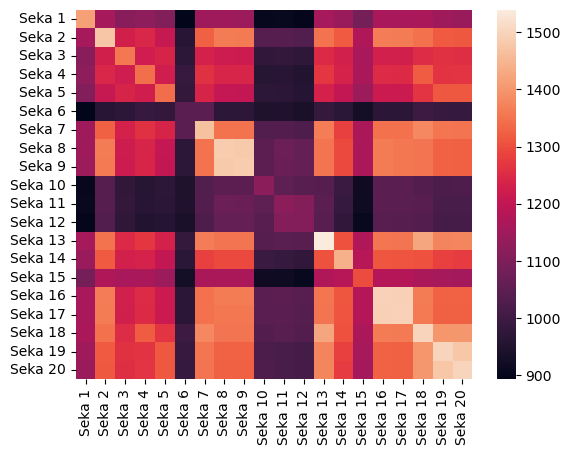

In [11]:
sns.heatmap(df, annot=False);

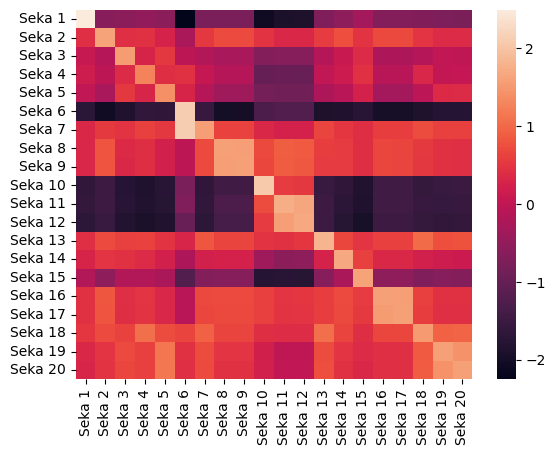

In [29]:
sns.heatmap(df_normalized,annot=False);

# 2 Dalis

Užduočiai pasirinktas ***Halopiger xanaduensis*** archėjos genomas, kurio ID: NC_012654.1. Genomo seka atsisiunčiama.

In [18]:
genome_id = "NC_012654.1"
handle = Entrez.efetch(db="nucleotide", id=genome_id, rettype="fasta", retmode="text")
genome = SeqIO.read(handle, "fasta");

C:\Users\manta\AppData\Roaming\Python\Python39\site-packages\Bio\Entrez\__init__.py:694: UserWarning: 
            Email address is not specified.

            To make use of NCBI's E-utilities, NCBI requires you to specify your
            email address with each request.  As an example, if your email address
            is A.N.Other@example.com, you can specify it as follows:
               from Bio import Entrez
               Entrez.email = 'A.N.Other@example.com'
            In case of excessive usage of the E-utilities, NCBI will attempt to contact
            a user at the email address provided before blocking access to the
            E-utilities.
  warnings.warn(


In [19]:
SeqIO.write(genome, "genome.fasta", "fasta");

In [20]:
genome_lenght = len(genome.seq)
T_lenght = 2000
print(genome_lenght)

270022


Iš genomo atsitiktinai iškerpamas 2000 bp ilgio fragmentas **T**.

In [21]:
cut_index = random.randint(0,genome_lenght - 2001)

T = genome[cut_index:cut_index + 2000]
genome_without_T = genome[:cut_index] + genome[cut_index + 2000:]

assert(len(genome) == len(T) + len(genome_without_T) and len(T) == 2000)

In [22]:
from Bio.Align import substitution_matrices
matrix_list = substitution_matrices.load()
print(matrix_list)
print(substitution_matrices.load('TRANS'))

['BENNER22', 'BENNER6', 'BENNER74', 'BLASTN', 'BLASTP', 'BLOSUM45', 'BLOSUM50', 'BLOSUM62', 'BLOSUM80', 'BLOSUM90', 'DAYHOFF', 'FENG', 'GENETIC', 'GONNET1992', 'HOXD70', 'JOHNSON', 'JONES', 'LEVIN', 'MCLACHLAN', 'MDM78', 'MEGABLAST', 'NUC.4.4', 'PAM250', 'PAM30', 'PAM70', 'RAO', 'RISLER', 'SCHNEIDER', 'STR', 'TRANS']
#  David Wheeler,
#  Department of Cell Biology, Baylor College of Medicine, Houston, Texas:
#  "Weight matrices for sequence similarity scoring."
#  Version 2.0, May 1996.
#  David Wheeler defined the Transition/Transversion Matrix as a penalty
#  matrix; the matrix below is a similarity matrix where
#  similarity = 5 - penalty.
    A   T   C   G
A 5.0 0.0 0.0 4.0
T 0.0 5.0 4.0 0.0
C 0.0 4.0 5.0 0.0
G 4.0 0.0 0.0 5.0



In [23]:
aligner = PairwiseAligner()
aligner.mode = 'local'
aligner.substitution_matrix = substitution_matrices.load('TRANS') - 4
aligner.gap_score = -2

Iš likusio genomo 10_000 kartų atsitiktinai parenkami 100 bp fragmentai, ir atliekami lokalūs išlyginimai su **T**.

In [ ]:
alignment_scores = np.empty((10000),dtype='int')
genome_without_T_lenght  = len(genome_without_T)

max_score = 0
for i in range(10000):
  fragment_index = random.randint(0,genome_without_T_lenght - 101)
  fragment = genome_without_T[fragment_index:fragment_index + 100]
  score = aligner.score(fragment,T)
  alignment_scores[i] = score
  if (score >= max_score):
    max_score = score
    best_fragment = fragment

In [ ]:
alignments = aligner.align(best_fragment,T)
print(alignments[0])
print(max_score)
print(alignments[0].score)

Pavaizduojama išlyginimų kainų histograma

In [ ]:
plt.hist(alignment_scores, edgecolor='black')
plt.xlabel('Alignment Score')
plt.ylabel('Frequency')
plt.title('Local Alignment Scores')
plt.show()